In [1]:
# Import Necessary Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read The DataSet.
df = pd.read_csv('sales_data_sample.csv',encoding='Latin-1')

In [3]:
# Show All Columns.
pd.set_option('display.max_columns', None)

In [3]:
# Removing Unnecessary Column From The DataSet.  
sales = df.drop(columns=['TERRITORY','POSTALCODE','ADDRESSLINE2','STATUS',
'PHONE','PRODUCTCODE','MSRP','CONTACTFIRSTNAME','CONTACTLASTNAME','QTR_ID','ORDERLINENUMBER','DEALSIZE','COUNTRY','STATE','CUSTOMERNAME'
,'YEAR_ID','MONTH_ID'])

In [4]:
# Rename The Selected Column in The DataFrame.
sales = sales.rename({'ORDERNUMBER': 'Order ID',
              'QUANTITYORDERED' : 'Quantity Ordered',
              'PRICEEACH' : 'Price Each',
              'ORDERDATE': 'OrderDate',
              'PRODUCTLINE' : 'Product',
              'ADDRESSLINE1' : 'Address',
              'SALES' : 'Sales',
              'CITY' : 'City'
               },axis = 1)

In [5]:
# Showing The Info of The DataFrame.
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          2823 non-null   int64  
 1   Quantity Ordered  2823 non-null   int64  
 2   Price Each        2823 non-null   float64
 3   Sales             2823 non-null   float64
 4   OrderDate         2823 non-null   object 
 5   Product           2823 non-null   object 
 6   Address           2823 non-null   object 
 7   City              2823 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 176.6+ KB


In [6]:
# Showing The Describe of The DataSet
sales.describe()

,Order ID,Quantity Ordered,Price Each,Sales
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,3553.889072
std,92.085478,9.741443,20.174277,1841.865106
min,10100.000000,6.000000,26.880000,482.130000
25%,10180.000000,27.000000,68.860000,2203.430000
50%,10262.000000,35.000000,95.700000,3184.800000
75%,10333.500000,43.000000,100.000000,4508.000000
max,10425.000000,97.000000,100.000000,14082.800000


In [7]:
# Ensure That There are Non-Null Values Left in The DataFrame.
sales.isnull().sum()

Order ID            0
Quantity Ordered    0
Price Each          0
Sales               0
OrderDate           0
Product             0
Address             0
City                0
dtype: int64

In [7]:
# Showing If There Any Duplicated Row
sum(sales.duplicated())

0

In [9]:
# Group The Data By Product.
grouped_data = sales.groupby(['Product']).agg({
    'Sales': 'sum',
    'Quantity Ordered': 'sum',
    'Price Each': 'mean',
    'Order ID': 'count'
}).reset_index()

In [10]:
# Rename The Columns.
grouped_data = grouped_data.rename(columns={
    'Sales': 'Total Revenue Generated',
    'Quantity Ordered': 'Total Units Sold',
    'Price Each': 'Average Price Per Unit',
    'Order ID': 'Total Number of Orders'
})

In [11]:
# Sort The Data By Revenue in Ascending Order.
grouped_data = grouped_data.sort_values('Total Revenue Generated', ascending=True)

In [12]:
# Print The Result.
print(grouped_data.to_string(index=False))

         Product  Total Revenue Generated  Total Units Sold  Average Price Per Unit  Total Number of Orders
          Trains                226243.47              2712               75.654675                      77
           Ships                714437.13              8127               83.855470                     234
          Planes                975003.57             10727               81.740915                     306
Trucks and Buses               1127789.84             10777               87.527940                     301
     Motorcycles               1166388.34             11663               82.997553                     331
    Vintage Cars               1903150.84             21069               78.148204                     607
    Classic Cars               3919615.66             33992               87.335781                     967


In [13]:
# Convert The Order Date column To a Datetime Format.
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])

In [14]:
# Extract The Month From Each Date.
sales['Month'] = sales['OrderDate'].dt.month_name()

In [29]:
# Group The Data By Month & Compute The Metrics.
metrics = sales.groupby('Month').agg({'Sales': 'sum', 'Quantity Ordered': 'sum', 'Price Each': 'mean'})

In [30]:
# Rename The Columns.
metrics = metrics.rename(columns={
    'Sales': 'Total Revenue Generated',
    'Quantity Ordered': 'Total Units Sold',
    'Price Each': 'Average Price Per Unit'
})

In [31]:
# Print The Results.
print(metrics)

           Total Revenue Generated  Total Units Sold  Average Price Per Unit
Month                                                                       
April                    669390.96              6704               82.939775
August                   659310.57              6538               83.634084
December                 634679.12              6293               83.253222
February                 810441.90              7903               84.386116
January                  785874.44              7997               83.457555
July                     514875.97              4899               85.856525
June                     454756.78              4620               83.003893
March                    754501.39              7585               82.229292
May                      923972.56              8992               83.878611
November                2118885.67             20857               83.736064
October                 1121215.22             10998               83.953375

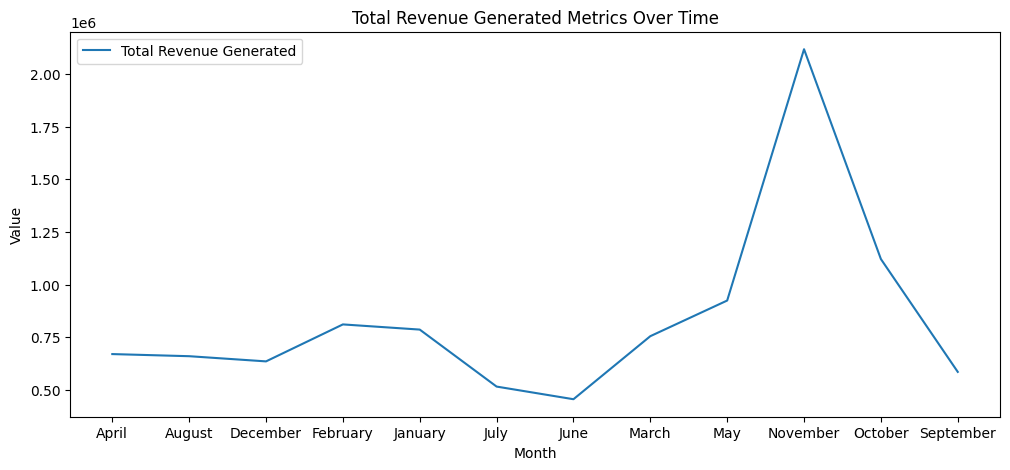

In [28]:
# Plot The Total Revenue Generated.
salesPlot = sales.set_index('Month')
plt.figure(figsize=(12, 5))
plt.plot(salesPlot.groupby('Month').agg({'Sales': 'sum'}), label='Total Revenue Generated')
plt.legend()
plt.title('Total Revenue Generated Metrics Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

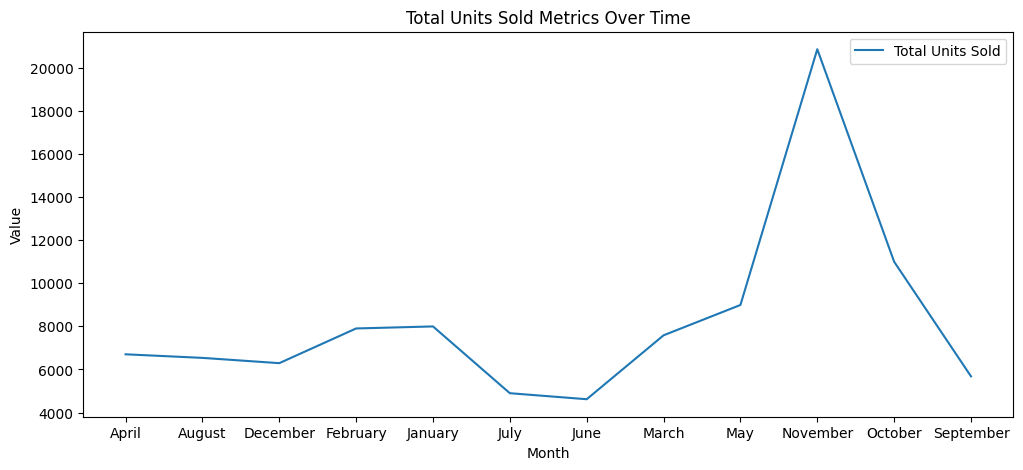

In [18]:
# Plot The Total Unit Sold.
plt.figure(figsize=(12, 5))
plt.plot(salesPlot.groupby('Month').agg({'Quantity Ordered': 'sum'}), label='Total Units Sold')
plt.legend()
plt.title('Total Units Sold Metrics Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

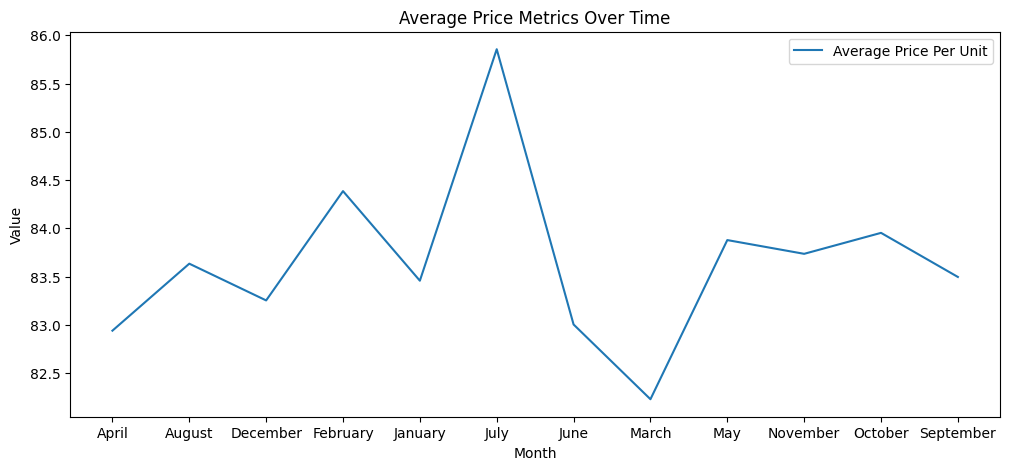

In [19]:
# Plot The Average Price Per Unit.
plt.figure(figsize=(12, 5))
plt.plot(salesPlot.groupby('Month').agg({'Price Each': 'mean'}), label= 'Average Price Per Unit')
plt.legend()
plt.title('Average Price Metrics Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

In [20]:
# Group the data by month and compute the metrics
sales_by_city = sales.groupby('City').agg({'Sales': 'sum'})

# Sort the data by sales in descending order
top_cities = sales_by_city.sort_values(by='Sales', ascending=False).head(5)

# Print the top 5 cities
print(top_cities)

                 Sales
City                  
Madrid      1082551.44
San Rafael   654858.06
NYC          560787.77
Singapore    288488.41
Paris        268944.68
